In [ ]:
#pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


#import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder ,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import tensorflow as tf
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

#import data

In [ ]:
df = pd.read_csv('/content/insurance.csv')

#EDA

##Exploration

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


##univariate analysis

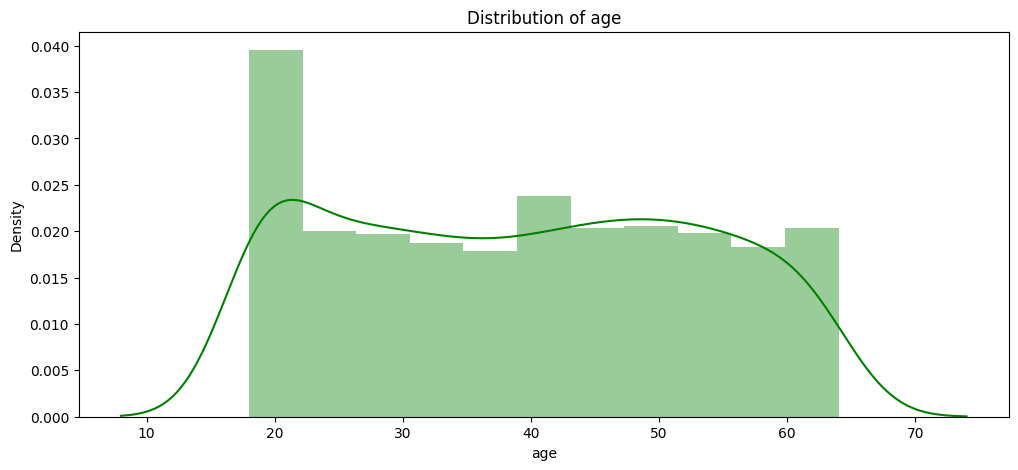

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

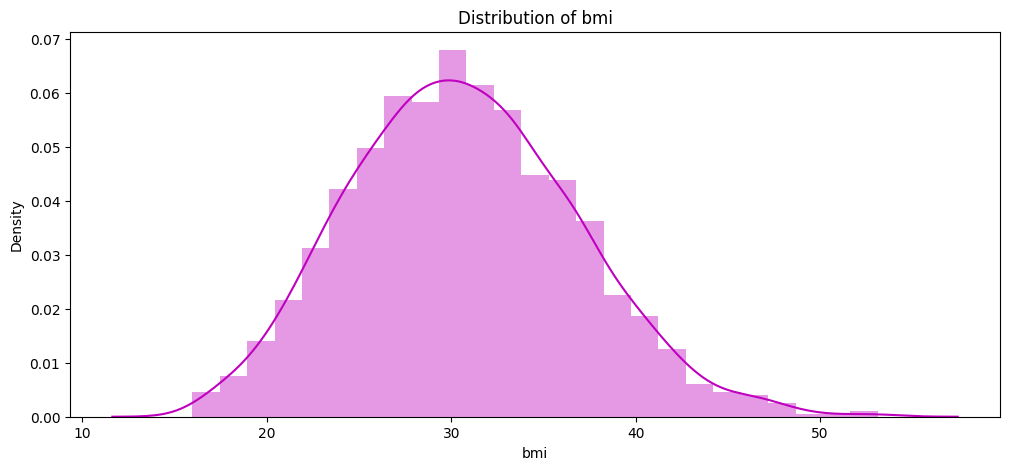

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

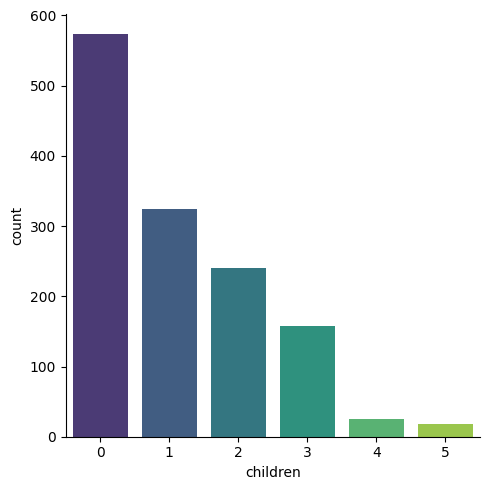

In [ ]:
sns.catplot(x="children", kind="count", palette="viridis", data=df)

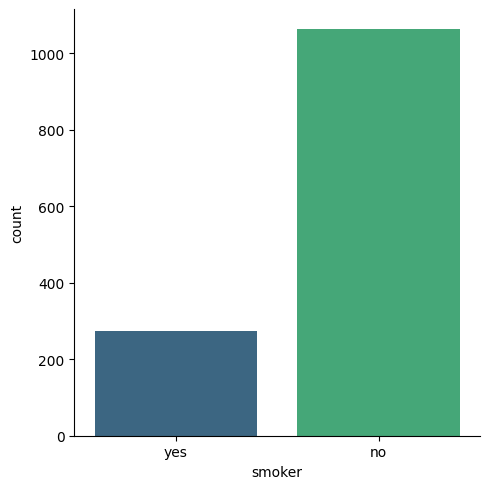

In [ ]:
sns.catplot(x="smoker", kind="count", palette="viridis", data=df)

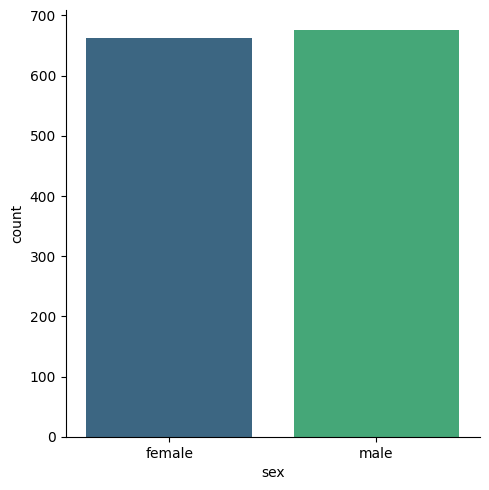

In [ ]:
sns.catplot(x="sex", kind="count", palette="viridis", data=df)

##distribution of the target var

Text(0.5, 1.0, 'Distribution of Charges')

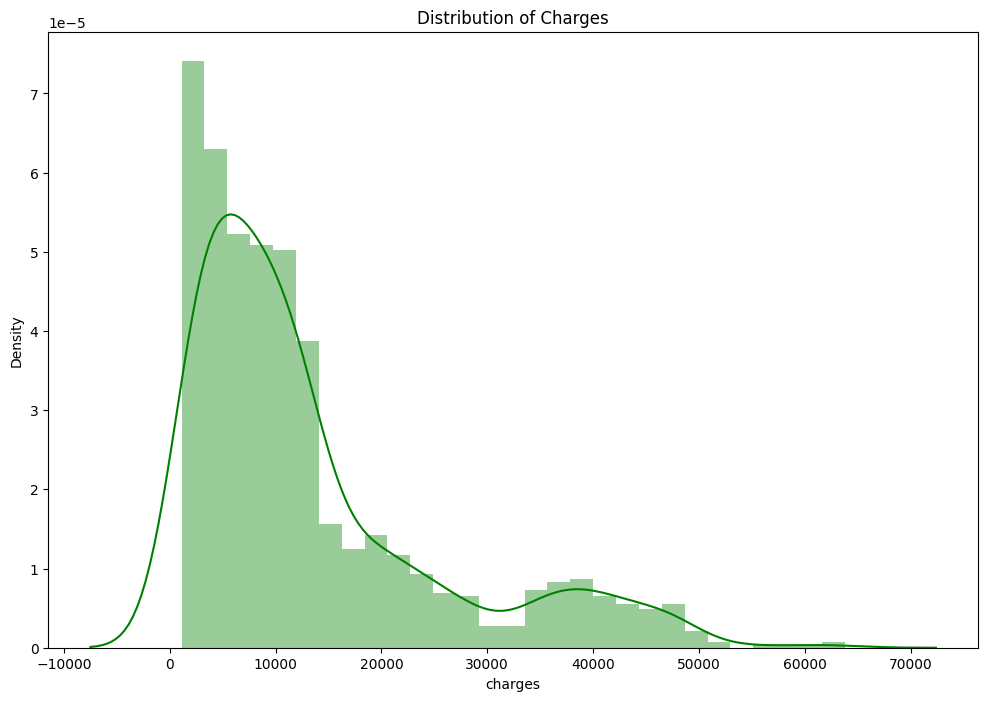

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'g')
plt.title('Distribution of Charges')

##multivariate analysis

<Figure size 1000x1000 with 0 Axes>

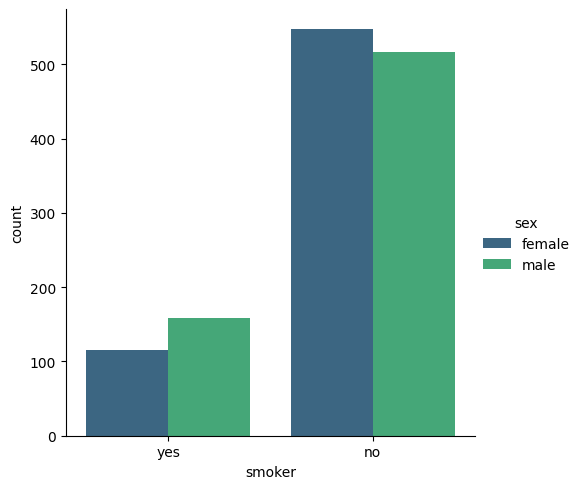

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="viridis", data=df)
plt.show()

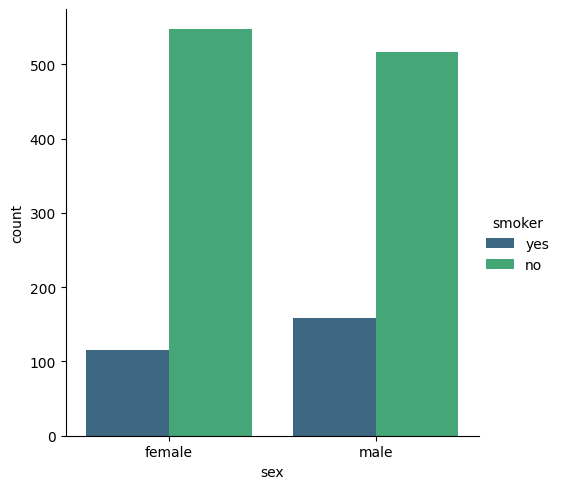

In [ ]:
sns.catplot(x="sex", kind="count",hue = 'smoker', palette="viridis", data=df)


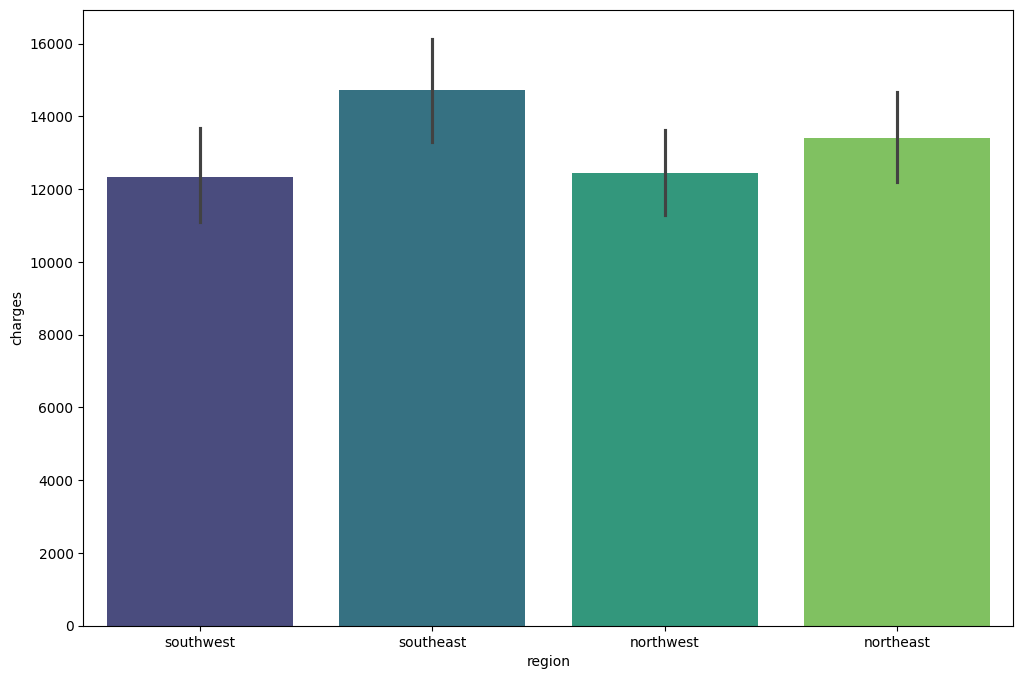

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='charges', data=df, palette='viridis')
plt.show()

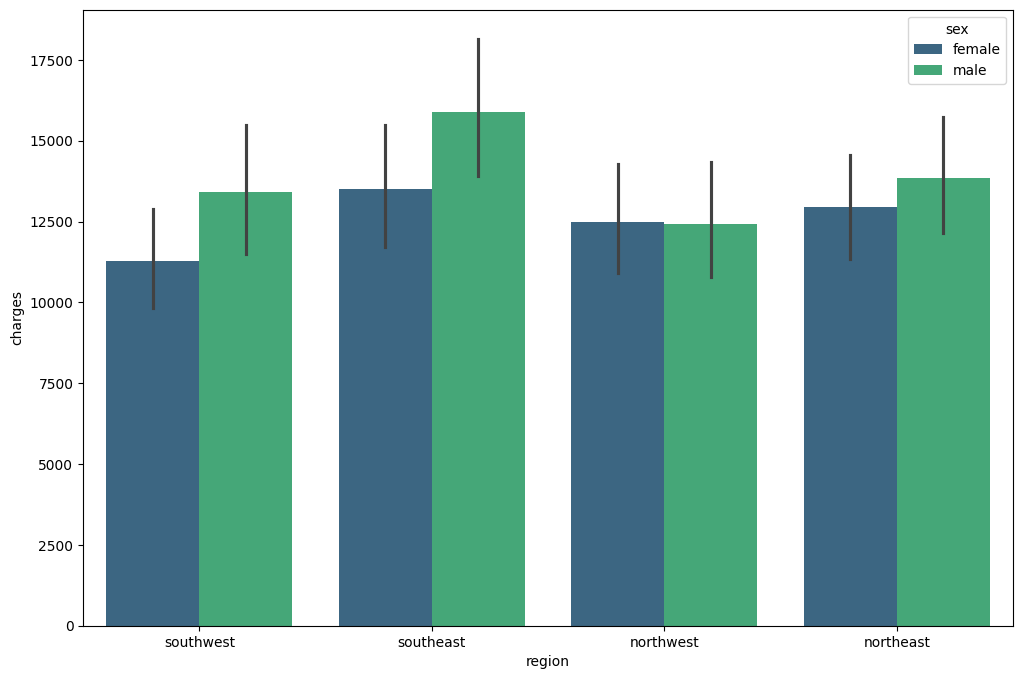

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='viridis')

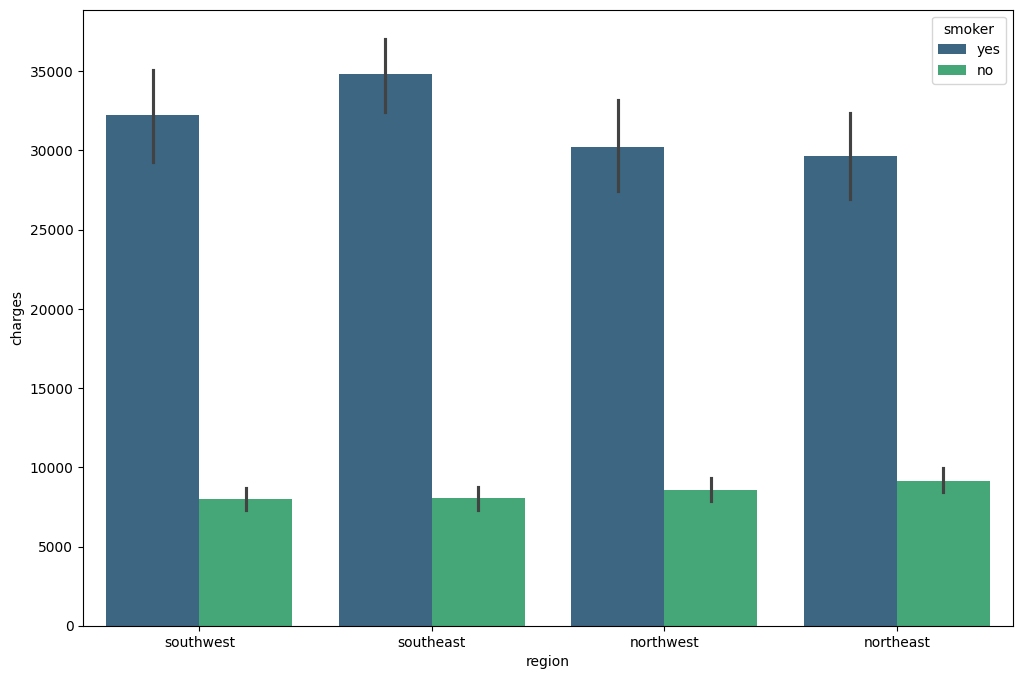

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='viridis')

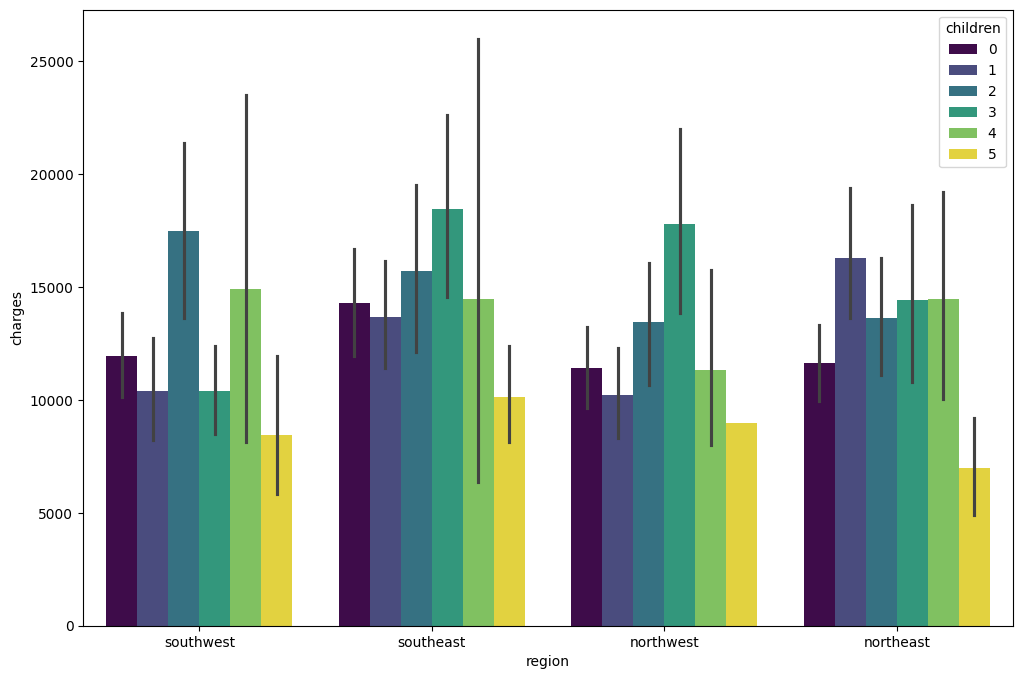

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='viridis')

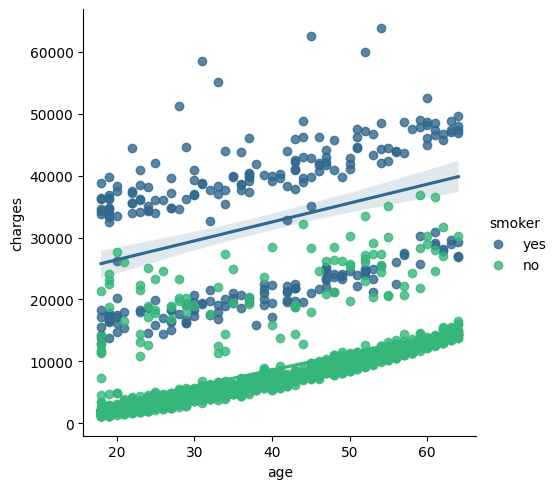

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='viridis')

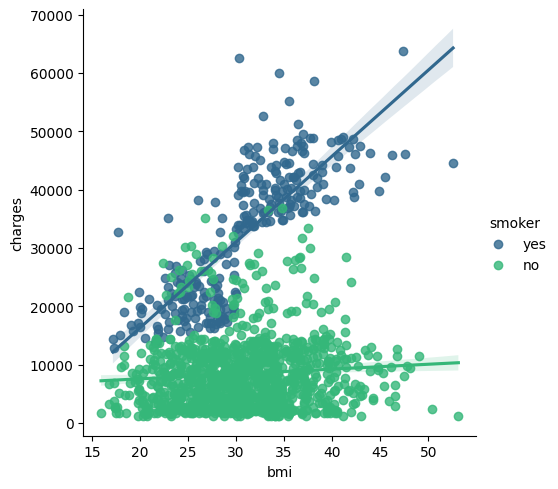

In [ ]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='viridis')

#Scaling & Encoding

In [ ]:
scaler = StandardScaler()
encoder = LabelEncoder()

In [ ]:
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

In [ ]:
numerical_features = ['age','bmi','children','charges']

In [ ]:
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,-6.643070e-17,1.000374,-1.511647,-0.870580,-0.015823,0.838934,1.764921
sex,1337.0,5.048616e-01,0.500163,0.000000,0.000000,1.000000,1.000000,1.000000
bmi,1337.0,-2.285216e-16,1.000374,-2.411119,-0.717173,-0.043202,0.661926,3.684136
children,1337.0,3.852980e-17,1.000374,-0.909234,-0.909234,-0.079442,0.750351,3.239729
smoker,1337.0,2.049364e-01,0.403806,0.000000,0.000000,0.000000,0.000000,1.000000
region,1337.0,1.516081e+00,1.105208,0.000000,1.000000,2.000000,2.000000,3.000000
charges,1337.0,-1.009747e-16,1.000374,-1.004247,-0.704849,-0.321577,0.279088,4.170826


#correlation matrix

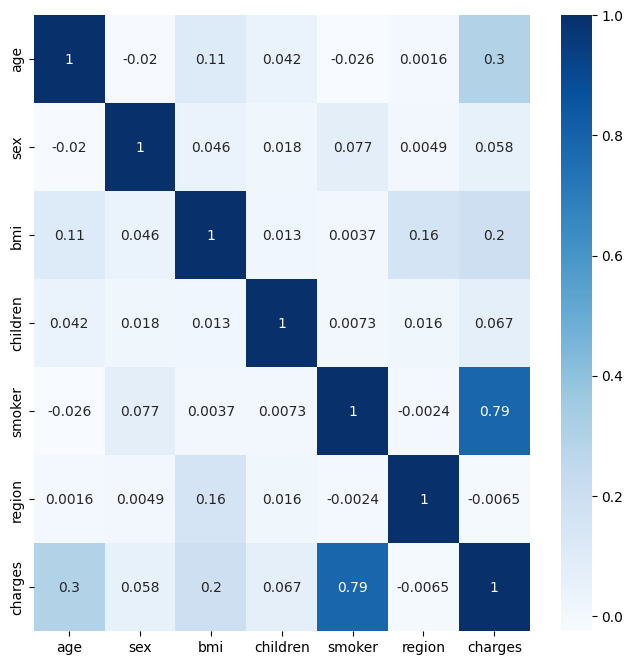

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

**forte corrélation positive entre la variable smoker et la variable cible**

#data splitting

In [ ]:
X = df.drop(['charges'], axis = 1)
y = df['charges']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1069, 6) (268, 6) (1069,) (268,)


#Building Models

##tensorflow

**Les hyperparamétres de notre modéle**
*   **Nombre de couches :**
notre modèle est composé de 6 couches denses (5 couches cachées + 1 couche de sortie).
*  **Nombre de neurones par couche :**
Les couches ont respectivement 300, 200, 100, 50, 10, et 1 neurones.

*   **Fonctions d’activation :**
Toutes les couches cachées utilisent la fonction ReLU :
f(x)=max(0,x)
Elle introduit la non-linéarité, permettant au réseau de modéliser des relations complexes.

*   **Méthode d’optimisation :**
Le modèle utilise Adam, une méthode avancée basée sur le gradient qui combine les avantages de RMSProp et SGD avec momentum.

*   **Taux d’apprentissage (learning_rate) :**
Défini à 0.1, ce paramètre contrôle la vitesse à laquelle le modèle ajuste ses poids.
*   **Fonction de perte :**
Utilisation de l'erreur absolue moyenne (MAE) pour minimiser les écarts absolus entre les prédictions et les valeurs réelles.
*   **Nombre d’époques (epochs) :**
Défini à 300, cela signifie que notre modèle passe 300 fois sur les données d'entraînement.

In [ ]:
# Definir le modéle
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiler le modéle
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)

# Entrainer le  modéle
model_history = model.fit(X_train, y_train, epochs=300)


Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 50.7371 - mae: 50.7371
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6740 - mae: 0.6740
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6760 - mae: 0.6760
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6895 - mae: 0.6895
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6814 - mae: 0.6814
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6892 - mae: 0.6892
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6678 - mae: 0.6678
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6557 - mae: 0.6557
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6866 - mae: 0.6866
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6637 - mae: 0.6637
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6993 - mae: 0.6993
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6734 - mae: 0.6734
Epoch 13/300
34/34 ━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7501 - mae: 0.7501  


[0.7673997282981873, 0.7673997282981873]

**L'erreur est stable entre l'entraînement et le test, suggérant que le modèle n'a pas surappris (pas d'overfitting significatif).**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,915 (1.01 MB)

 Trainable params: 87,971 (343.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 175,944 (687.29 KB)

###hyperparamter tunning

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1])
        ),
        loss='mae',
        metrics=['mae']
    )
    return model
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='random_search',
    project_name='tf_rate_tuning'
)
tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             verbose=1)

Trial 3 Complete [00h 00m 15s]
val_mae: 0.13138490915298462

Best val_mae So Far: 0.13138490915298462
Total elapsed time: 00h 00m 47s


In [ ]:
# meilleurs hyperparamètres
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("meilleurs hyperparamètres")
print(f"Taux d'apprentissage : {best_hps.get('learning_rate')}")

meilleurs hyperparamètres
Taux d'apprentissage : 0.01


In [ ]:
# best_model
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train, y_train,
                         epochs=300,
                         validation_data=(X_test, y_test),
                         verbose=1)

test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Erreur MAE sur les données de test : {test_mae}")

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6935 - mae: 0.6935 - val_loss: 0.5554 - val_mae: 0.5554
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4309 - mae: 0.4309 - val_loss: 0.5218 - val_mae: 0.5218
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4749 - mae: 0.4749 - val_loss: 0.4936 - val_mae: 0.4936
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4414 - mae: 0.4414 - val_loss: 0.4256 - val_mae: 0.4256
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3400 - mae: 0.3400 - val_loss: 0.4103 - val_mae: 0.4103
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3173 - mae: 0.3173 - val_loss: 0.4083 - val_mae: 0.4083
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3481 - mae: 0.3481 - val_loss: 0.4005 - val_mae: 0.4005
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3012 - mae: 0.3012 - val_loss: 0.2491 - val_mae: 0.2491
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.21

In [ ]:
y_pred = best_model.predict(X_test)

mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
r2 = round(r2_score(y_test, y_pred), 3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
tf_result=[]
tf_result.append({
            'Model': "tensorflow",
            'MSE': mse,
            'MAE': mae,
            'R^2': r2
        })

tf_result_df = pd.DataFrame(tf_result)
tf_result_df

,Model,MSE,MAE,R^2
0,tensorflow,0.178,0.157,0.845


###leraning curves

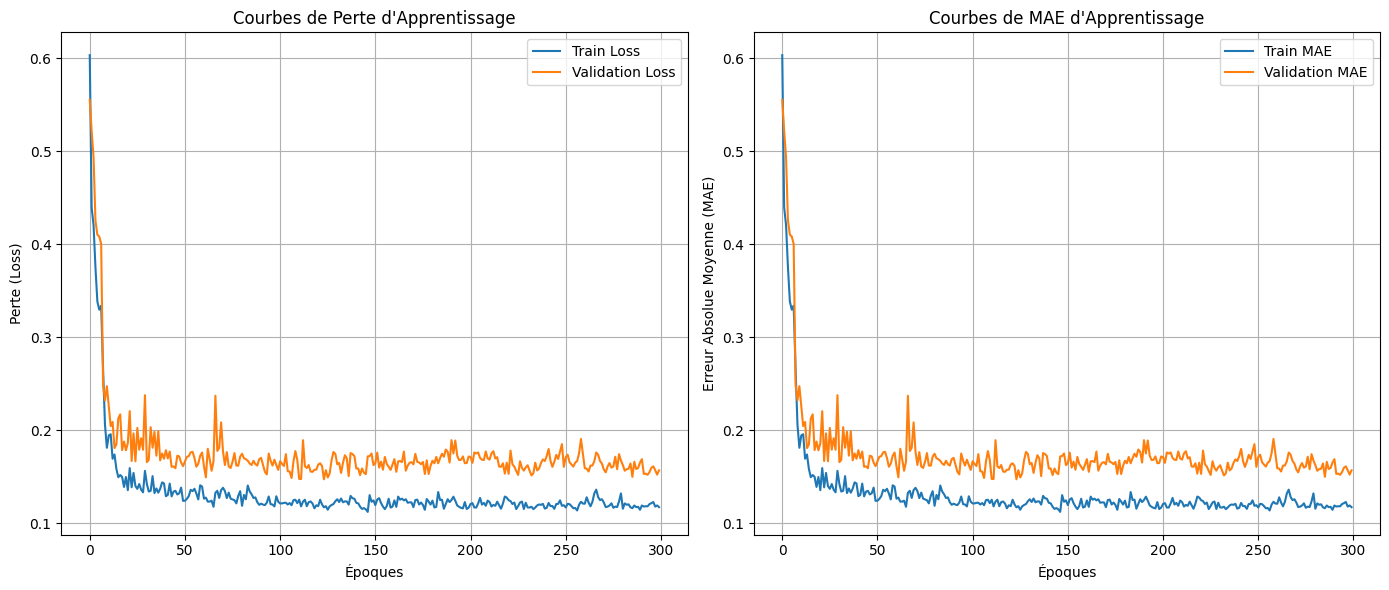

In [ ]:
plt.figure(figsize=(14, 6))

#loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbes de Perte d\'Apprentissage')
plt.xlabel('Époques')
plt.ylabel('Perte (Loss)')
plt.legend()
plt.grid()

#MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Courbes de MAE d\'Apprentissage')
plt.xlabel('Époques')
plt.ylabel('Erreur Absolue Moyenne (MAE)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

##Trying Other Models

In [ ]:
regressors = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
}
for key, regressor in regressors.items():
    print(f"\nParameters of {key}:\n")
    for param, value in regressor.get_params().items():
        print(f"{param}: {value}")


Parameters of LinearRegression:

copy_X: True
fit_intercept: True
n_jobs: None
positive: False

Parameters of DecisionTreeRegressor:

ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: None
splitter: best

Parameters of RandomForestRegressor:

bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False

Parameters of GradientBoostingRegressor:

alpha: 0.9
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: squared_error
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_

In [ ]:
for key, regressor in tqdm(regressors.items(), desc="Entraînement"):
    regressor.fit(X_train.values, y_train.values)
    training_score = cross_val_score(regressor, X_train.values, y_train.values, cv=5)
    print(regressor.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "%  score")

Entraînement:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression Has a training score of 74.0 % accuracy score
DecisionTreeRegressor Has a training score of 68.0 % accuracy score


Entraînement:  75%|███████▌  | 3/4 [00:02<00:00,  1.39it/s]

RandomForestRegressor Has a training score of 83.0 % accuracy score


Entraînement: 100%|██████████| 4/4 [00:02<00:00,  1.33it/s]

GradientBoostingRegressor Has a training score of 85.0 % accuracy score


In [ ]:
def evaluate_regressors(regressors, X_train, y_train, X_test, y_test):
    results = []

    for model_name, model in regressors.items():
        model.fit(X_train, y_train)

        pred = model.predict(X_test)

        mse = round(mean_squared_error(y_test, pred), 3)
        mae = round(mean_absolute_error(y_test, pred), 3)
        r2 = round(r2_score(y_test, pred), 3)

        results.append({
            'Model': model_name,
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'R^2 Score': r2
        })

    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
results_df = evaluate_regressors(regressors, X_train, y_train, X_test, y_test)
print(results_df)

                       Model  Mean Squared Error  Mean Absolute Error  \
0           LinearRegression               0.284                0.364   
1      DecisionTreeRegressor               0.331                0.283   
2      RandomForestRegressor               0.184                0.241   
3  GradientBoostingRegressor               0.174                0.229   

   R^2 Score  
0      0.753  
1      0.712  
2      0.839  
3      0.848  


**GradientBoostingRegressor est le modèle à privilégier pour ce problème, offrant une meilleure précision avec une faible erreur.**

###hyperparams tunning of gradientboosting

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.001, 0.01, 0.1],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.8, 1.0]
}

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}


In [ ]:
# Meilleur modèle trouvé
best_gbr = grid_search.best_estimator_
#prediction
y_pred = best_gbr.predict(X_test)

mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
r2 = round(r2_score(y_test, y_pred), 3)

gbr_result=[]
gbr_result.append({
            'Model': "GradientBoosting",
            'MSE': mse,
            'MAE': mae,
            'R^2': r2
        })

gbr_result_df = pd.DataFrame(gbr_result)
gbr_result_df

,Model,MSE,MAE,R^2
0,GradientBoosting,0.171,0.231,0.851


#model comparison

In [ ]:
compare_result_df = pd.concat([tf_result_df, gbr_result_df], ignore_index=True)
compare_result_df

,Model,MSE,MAE,R^2
0,tensorflow,0.178,0.157,0.845
1,GradientBoosting,0.171,0.231,0.851
